# Generador de musica
Este codigo genera musica sencilla empleando tonos senoidales concatenados. Cada tono tiene una frecuencia dada por el diccionario de notas. Luego, para hacer un tema musical basta con generar una lista que contenga en su interior informacion de la nota, su duración y además si existe un tiempo de silencio entre notas... para simular el instrumento.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile

Las frecuencias (en Hz) fueron tomadas de manera experimental observando un espectrograma mientras se tocaban notas de una flauta dulce

In [ ]:
notas = {
    "do":520,
    "re":586,
    "mi":650,
    "fa":691,
    "sol":773,
    "la":867,
    "si":973
}

Esto puede mejorarse incluyendo los armonicos de cada nota!!! (y adaptando un poco el código por supuesto)

A continuación se observan como bastones las frecuencias correspondientes a cada nota

Text(0, 0.5, 'Frecuencia [Hz]')

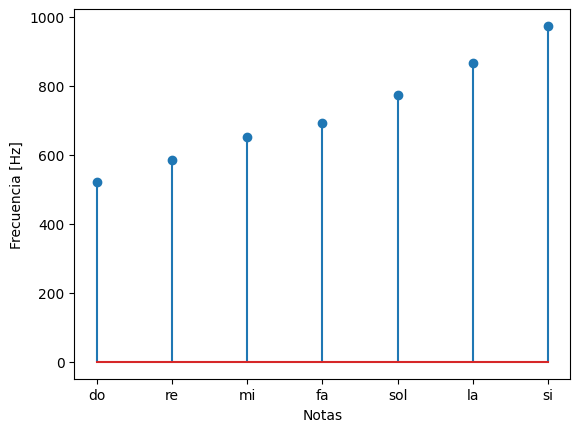

In [ ]:
plt.stem(notas.keys(),notas.values())
plt.xlabel('Notas')
plt.ylabel('Frecuencia [Hz]')

La frecuencia de muestreo empleada es común para música. Los otros parámetros: dt y dcn son de un valor arbitrario.

In [ ]:
fs = 44100  # rate | frecuencia de muestreo
dt = 0.4    # duracion de un tiempo en segundos
dcn = 0.05   # duracion de cambio de nota:
            # el espacio entre notas,
            # para que la transicion de una nota a otra no sea instantanea

El siguiente tema simple está compuesto por las notas, su duración, y la duración del silencio entre notas. Estos se representa en cada lista de tres elementos en cada renglón

In [ ]:
tema_simple = [
    ["do",1,1],
    ["re",0.5,1],
    ["do",0.5,1],
    ["do",1,1],
    ["re",0.5,1],
    ["mi",0.5,1],
    ["sol",1,1],
    ["mi",2,0],
    ["mi",0,5], # equivale a un tiempo de silencio (no importa la nota)
    ["do",0.5,1],
    ["re",0.5,1],
    ["do",0.5,1],
    ["re",0.5,1],
    ["mi",1,1],
    ["mi",1,1],
    ["re",2,1],
    ["do",2,0]
]

Por cada nota en el tema musical, debe generarse un tono senoidal.

In [ ]:
ondas = []
dospi = 2*np.pi
for n in tema_simple:
  d = n[1]*dt
  N = int(d*fs)
  t = np.linspace(0,d,N)
  tono = np.sin(dospi*notas[n[0]]*t)
  intervalo = np.zeros(int(n[2]*dcn*fs))
  onda = np.concatenate((tono,intervalo))
  ondas.append(onda)

Concatenamos las ondas y lo guardamos como archivo de audio

In [ ]:
suma = np.concatenate(ondas)

In [ ]:
filen="simple3.wav"
wavfile.write(filen,fs,suma)